In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/insurance.csv')
df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.isnull().sum().sort_values(ascending= False)

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


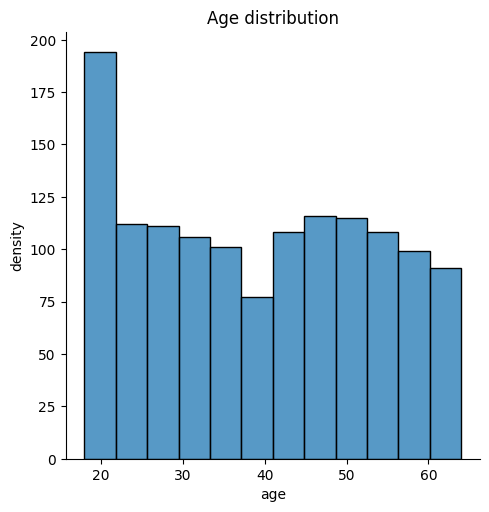

In [ ]:
sns.displot(df['age'])
plt.title('Age distribution')
plt.ylabel('density')
plt.xlabel('age')
plt.show()

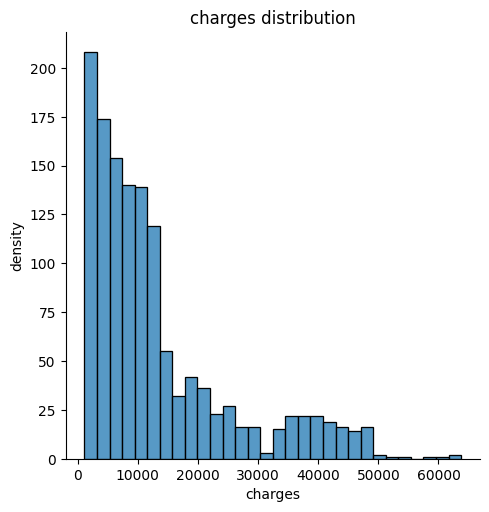

In [ ]:
sns.displot(df['charges'])
plt.title('charges distribution')
plt.ylabel('density')
plt.xlabel('charges')
plt.show()

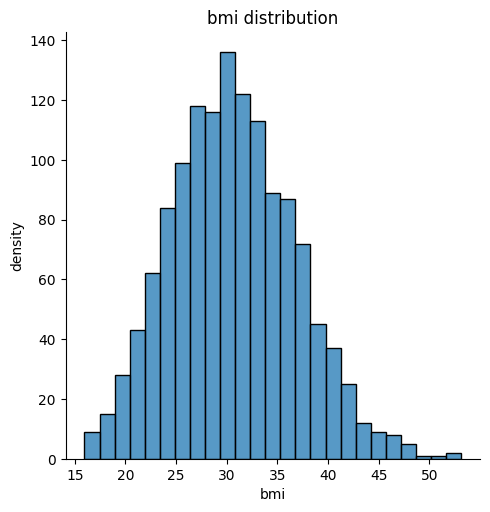

In [ ]:
sns.displot(df['bmi'])
plt.title('bmi distribution')
plt.ylabel('density')
plt.xlabel('bmi')
plt.show()

In [ ]:

df['region'].value_counts()


,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


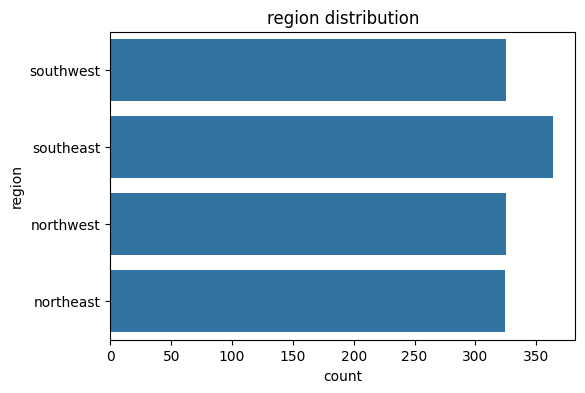

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(df['region'])
plt.title('region distribution')
plt.show()

In [ ]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


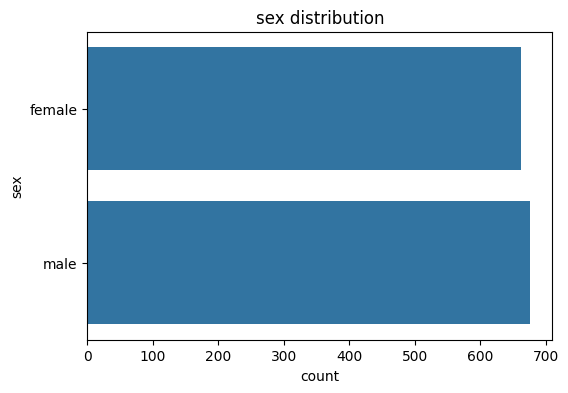

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.countplot(df['sex'])
plt.title('sex distribution')
plt.show()

In [ ]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


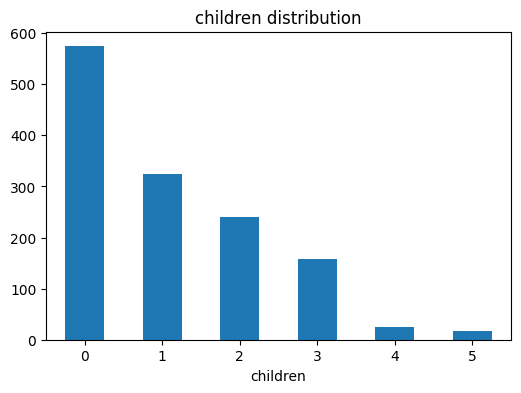

In [ ]:
fig = plt.figure(figsize = (6,4))
df['children'].value_counts().plot(kind="bar")
plt.title('children distribution')
plt.xticks(rotation = 0)
plt.show()

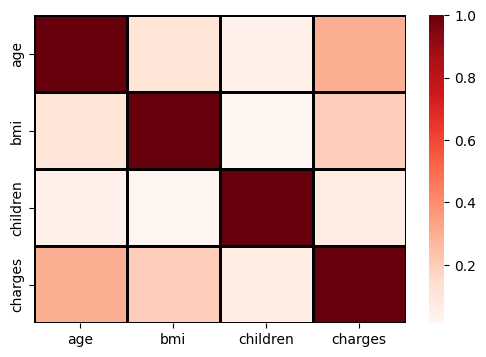

In [ ]:
fig = plt.figure(figsize = (6, 4))
data_ploting = df.select_dtypes(include=np.number).corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='Reds', linecolor='black', linewidths= 2 )
plt.show()

<Figure size 600x400 with 0 Axes>

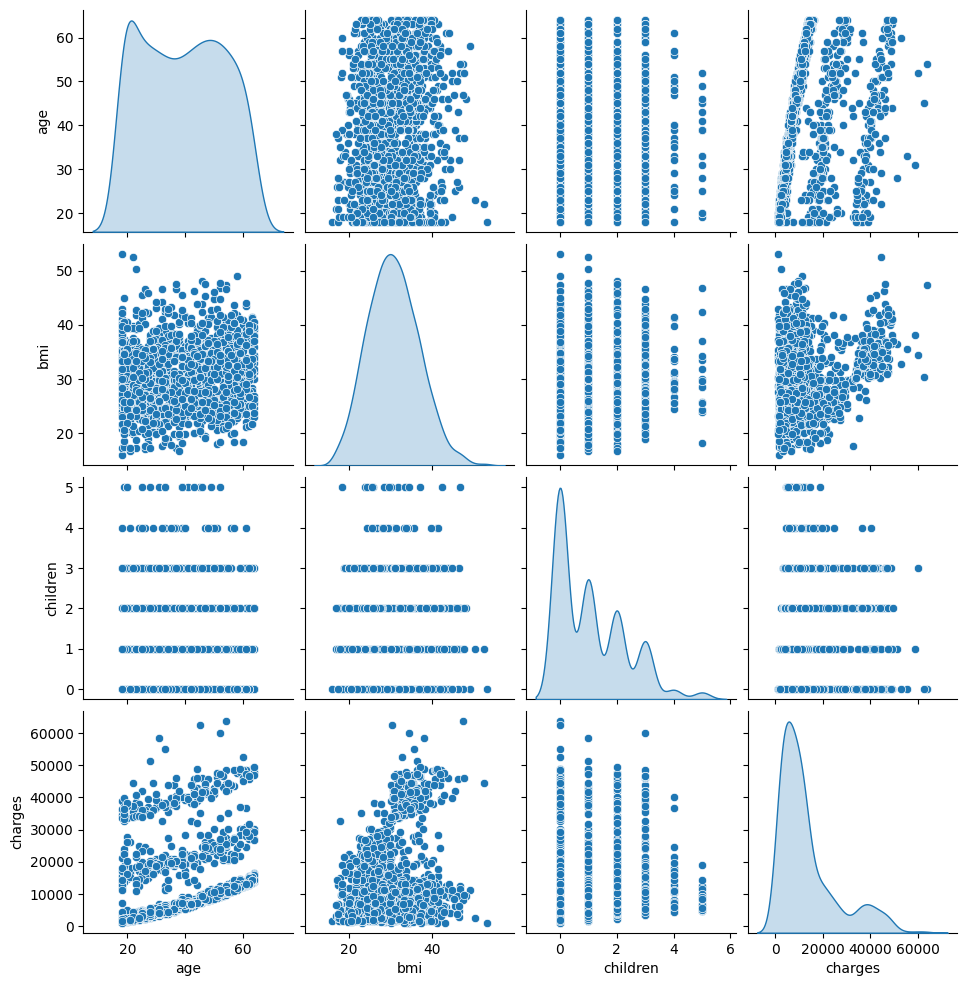

In [ ]:
fig = plt.figure(figsize = (6, 4))
sns.pairplot(df,diag_kind='kde');

In [ ]:
X = df.drop('charges', axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Select categorical columns
categorical_cols = ['sex', 'smoker', 'region']

# Apply one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure columns are aligned after one-hot encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Apply StandardScaler to the encoded data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

display(X_train_scaled)
display(X_test_scaled)

array([[ 0.92799531,  1.24941097,  0.75674405, ..., -0.58557505,
        -0.60368161, -0.55266566],
       [ 0.21473894,  0.85643216,  0.75674405, ..., -0.58557505,
         1.65650234, -0.55266566],
       [ 0.85666968,  1.43204012, -0.08248869, ..., -0.58557505,
        -0.60368161,  1.80941223],
       ...,
       [ 1.2846235 ,  0.53683114, -0.92172142, ...,  1.70772304,
        -0.60368161, -0.55266566],
       [ 0.92799531,  1.10999318,  0.75674405, ...,  1.70772304,
        -0.60368161, -0.55266566],
       [-0.21321489, -1.77130785, -0.92172142, ..., -0.58557505,
        -0.60368161, -0.55266566]])

array([[-0.07056361,  1.03253885, -0.08248869, ..., -0.58557505,
        -0.60368161, -0.55266566],
       [-1.35442509, -0.31516647, -0.92172142, ..., -0.58557505,
        -0.60368161, -0.55266566],
       [ 1.07064659, -0.85734677, -0.08248869, ..., -0.58557505,
        -0.60368161, -0.55266566],
       ...,
       [ 1.56992605, -0.13009139,  1.59597679, ..., -0.58557505,
         1.65650234, -0.55266566],
       [-0.92647126, -1.38403621, -0.92172142, ...,  1.70772304,
        -0.60368161, -0.55266566],
       [-1.06912254, -1.32370336, -0.92172142, ..., -0.58557505,
        -0.60368161,  1.80941223]])

In [ ]:
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = linear_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_li_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_li_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_li_reg =np.sqrt(MSE_li_reg)
pd.DataFrame([MAE_li_reg, MSE_li_reg, RMSE_li_reg], index=['MAE_li_reg', 'MSE_li_reg', 'RMSE_li_reg'], columns=['Metrics'])

,Metrics
MAE_li_reg,3.987963e+03
MSE_li_reg,3.368366e+07
RMSE_li_reg,5.803763e+03


In [ ]:
scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.88767236 0.85554565 0.84393954 0.87218569 0.84343467]


In [ ]:
r2_score(y_test, linear_reg_model.predict(X_test_scaled))

0.7602196966782768

In [ ]:
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = Gradient_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])

,Metrics
MAE_gradient,2.524436e+03
MSE_gradient,2.115408e+07
RMSE_gradient,4.599356e+03


In [ ]:
scores = cross_val_score(Gradient_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.94551062 0.91603191 0.92099362 0.92316263 0.91499459]


In [ ]:
r2_score(y_test, Gradient_model.predict(X_test_scaled))

0.8494126988165114

In [ ]:
XGB_model =XGBRegressor()
XGB_model.fit(X_train_scaled, y_train);

In [ ]:
y_pred = XGB_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_XGB= metrics.mean_absolute_error(y_test, y_pred)
MSE_XGB = metrics.mean_squared_error(y_test, y_pred)
RMSE_XGB =np.sqrt(MSE_XGB)
pd.DataFrame([MAE_XGB, MSE_XGB, RMSE_XGB], index=['MAE_XGB', 'MSE_XGB', 'RMSE_XGB'], columns=['Metrics'])

,Metrics
MAE_XGB,3.155483e+03
MSE_XGB,2.986226e+07
RMSE_XGB,5.464637e+03


In [ ]:
scores = cross_val_score(XGB_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.92150068 0.88890406 0.90176777 0.90424131 0.88745625]


In [ ]:
r2_score(y_test, XGB_model.predict(X_test_scaled))

0.7874226837863824

In [ ]:
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train_scaled, y_train);

In [ ]:
y_pred = tree_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg], index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])

,Metrics
MAE_tree_reg,3.518335e+03
MSE_tree_reg,5.122152e+07
RMSE_tree_reg,7.156921e+03


In [ ]:
scores = cross_val_score(tree_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.89975932 0.80475549 0.80701232 0.85468228 0.82461985]


In [ ]:
r2_score(y_test, tree_reg_model.predict(X_test_scaled))

0.6353747518218973

In [ ]:
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_scaled, y_train);

In [ ]:
y_pred = forest_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

,Metrics
MAE_forest_reg,2.907151e+03
MSE_forest_reg,2.521107e+07
RMSE_forest_reg,5.021063e+03


In [ ]:
scores = cross_val_score(forest_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.94069941 0.90204011 0.92100711 0.91568492 0.90095122]


In [ ]:
r2_score(y_test, forest_reg_model.predict(X_test_scaled))

0.8205326100756158

In [1]:
# --- Installing Libraries ---
!pip install pycaret
!pip install markupsafe==2.1.3
!pip install jinja2

  Using cached MarkupSafe-2.1.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.9 kB)
Using cached MarkupSafe-2.1.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (28 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.3
    Uninstalling MarkupSafe-3.0.3:
      Successfully uninstalled MarkupSafe-3.0.3


In [2]:
# --- Importing Libraries ---
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pycaret
import warnings
import jinja2

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import *
from pycaret.regression import *

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

RuntimeError: ('Pycaret only supports python 3.9, 3.10, 3.11. Your actual Python version: ', sys.version_info(major=3, minor=12, micro=12, releaselevel='final', serial=0), 'Please DOWNGRADE your Python version.')

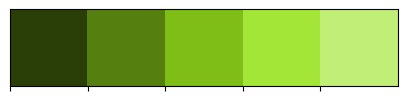

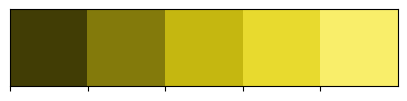

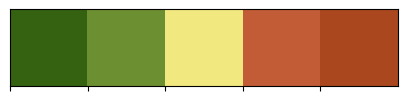

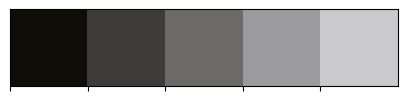

In [6]:
# --- Create List of Color Palletes ---
olive_grad = ['#2A3F07', '#557F0F', '#7FBE17', '#A4E637', '#C1EE76']
yellow_grad = ['#413D05', '#837A0B', '#C5B710', '#E8DA2E', '#F9EE6A']
color_mix = ['#356211', '#6C8F32', '#F2E880', '#C15C37', '#AA471F']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(olive_grad)
sns.palplot(yellow_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [5]:
ds = pd.read_csv('/content/sample_data/avocado.csv')
ds.head().style.background_gradient(cmap='Greens').set_properties(**{'font-family': 'Segoe UI'})

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.330000,64236.620000,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,conventional,2015,Albany
1,1,2015-12-20,1.350000,54876.980000,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,conventional,2015,Albany
2,2,2015-12-13,0.930000,118220.220000,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,conventional,2015,Albany
3,3,2015-12-06,1.080000,78992.150000,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,conventional,2015,Albany
4,4,2015-11-29,1.280000,51039.600000,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,conventional,2015,Albany


In [7]:
# --- Print Dataset Info ---
print('\033[92m\033[1m'+'.: Imported Dataset Info :.'+'\033[0m')
print('\033[92m*' * 30+'\033[0m')
print('Total Rows:'+'\033[92m\033[1m', ds.shape[0])
print('\033[0m'+'Total Columns:'+'\033[92m\033[1m', ds.shape[1])
print('\033[0m\033[92m'+'*' * 30+'\033[0m')
print('\n')

# --- Print Dataset Detail ---
print('\033[92m\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('\033[0m\033[92m'+'*' * 30+'\033[0m')
ds.info(memory_usage = False)

.: Imported Dataset Info :.
******************************
Total Rows: 18249
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), in

****************************************
.: Total Avocado based on each Type :.
****************************************


,count
type,
conventional,9126
organic,9123


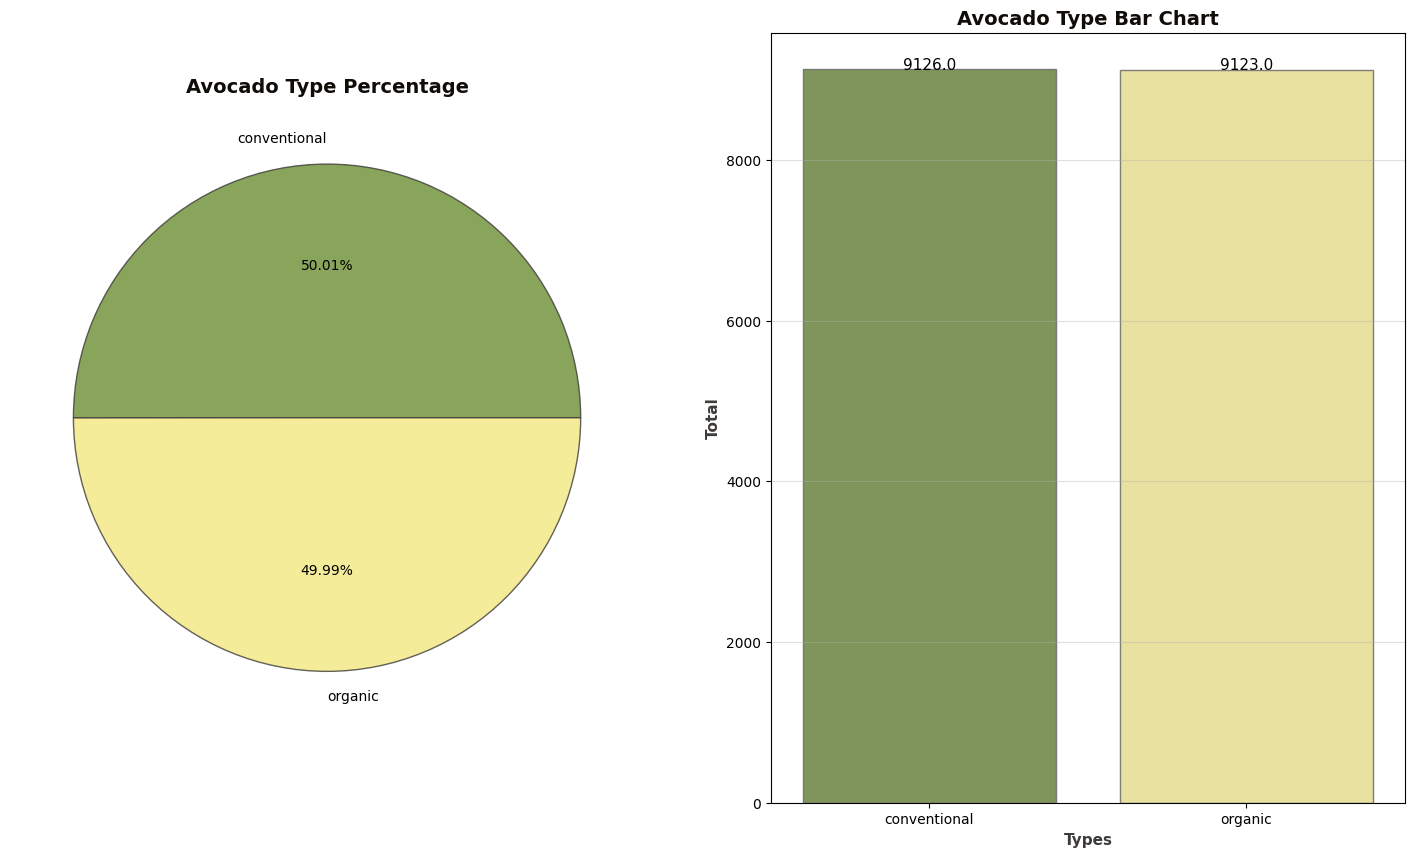

In [9]:
# --- Colors and Labels (Null Values Dropped) ---
colors = color_mix[1:3]
labels = ds['type'].dropna().unique()
order = ds['type'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18, 10))

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Avocado Type Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
          color = black_grad[0])
plt.pie(ds['type'].value_counts(), labels = order, colors = colors,
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%')
# --- Bar Chart ---
countplt = plt.subplot(1, 2, 2)
plt.title('Avocado Type Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'type', data = ds, palette = colors, order = order, edgecolor = black_grad[2], alpha = 0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+0.75,rect.get_height(), horizontalalignment = 'center',
             fontsize = 11)

plt.xlabel('Types', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[92m'+'*' * 40)
print('\033[92m\033[1m'+'.: Total Avocado based on each Type :.'+'\033[0m')
print('\033[92m'+'*' * 40+'\033[0m')
ds.type.value_counts(dropna=False)

***********************************
.: Total Avocado based on Year :.
***********************************


,count
year,
2017,5722
2016,5616
2015,5615
2018,1296


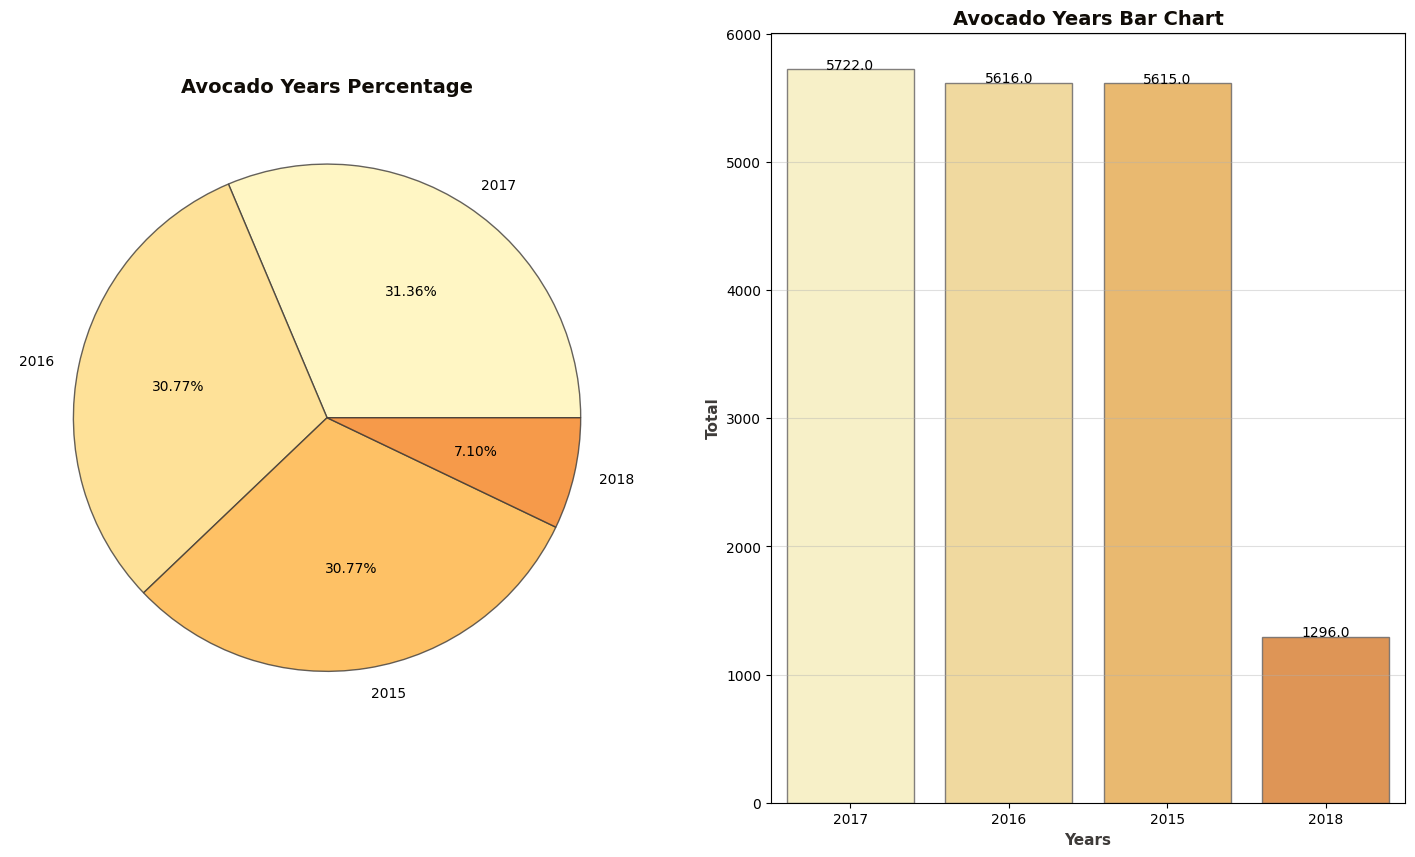

In [10]:
# --- Colors and Labels (Null Values Dropped) ---
colors = sns.color_palette('YlOrBr')
labels = ds['year'].dropna().unique()
order = ds['year'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18,10))

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Avocado Years Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
plt.pie(ds['year'].value_counts(), labels = order, colors = colors,
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%')
# --- Bar Chart ---
countplt = plt.subplot(1,2,2)
plt.title('Avocado Years Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'year', data = ds, palette = colors, order = order, edgecolor = black_grad[2], alpha = 0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+0.75,rect.get_height(), horizontalalignment = 'center',
             fontsize = 10)

plt.xlabel('Years', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
countplt
# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[92m'+'*' * 35)
print('\033[92m\033[1m'+'.: Total Avocado based on Year :.'+'\033[0m')
print('\033[92m'+'*' * 35+'\033[0m')
ds.year.value_counts(dropna=False)


In [11]:
# --- Count Categorical Labels w/Out Dropping Null Walues ---
print('\033[92m'+'*' * 38)
print('\033[92m\033[1m'+'.: Total Avocado based on Regions :.'+'\033[0m')
print('\033[92m'+'*' * 38)
ds.region.value_counts(dropna=False)

**************************************
.: Total Avocado based on Regions :.
**************************************


,count
region,
Albany,338
Sacramento,338
Northeast,338
NorthernNewEngland,338
Orlando,338
Philadelphia,338
PhoenixTucson,338
Pittsburgh,338
Plains,338


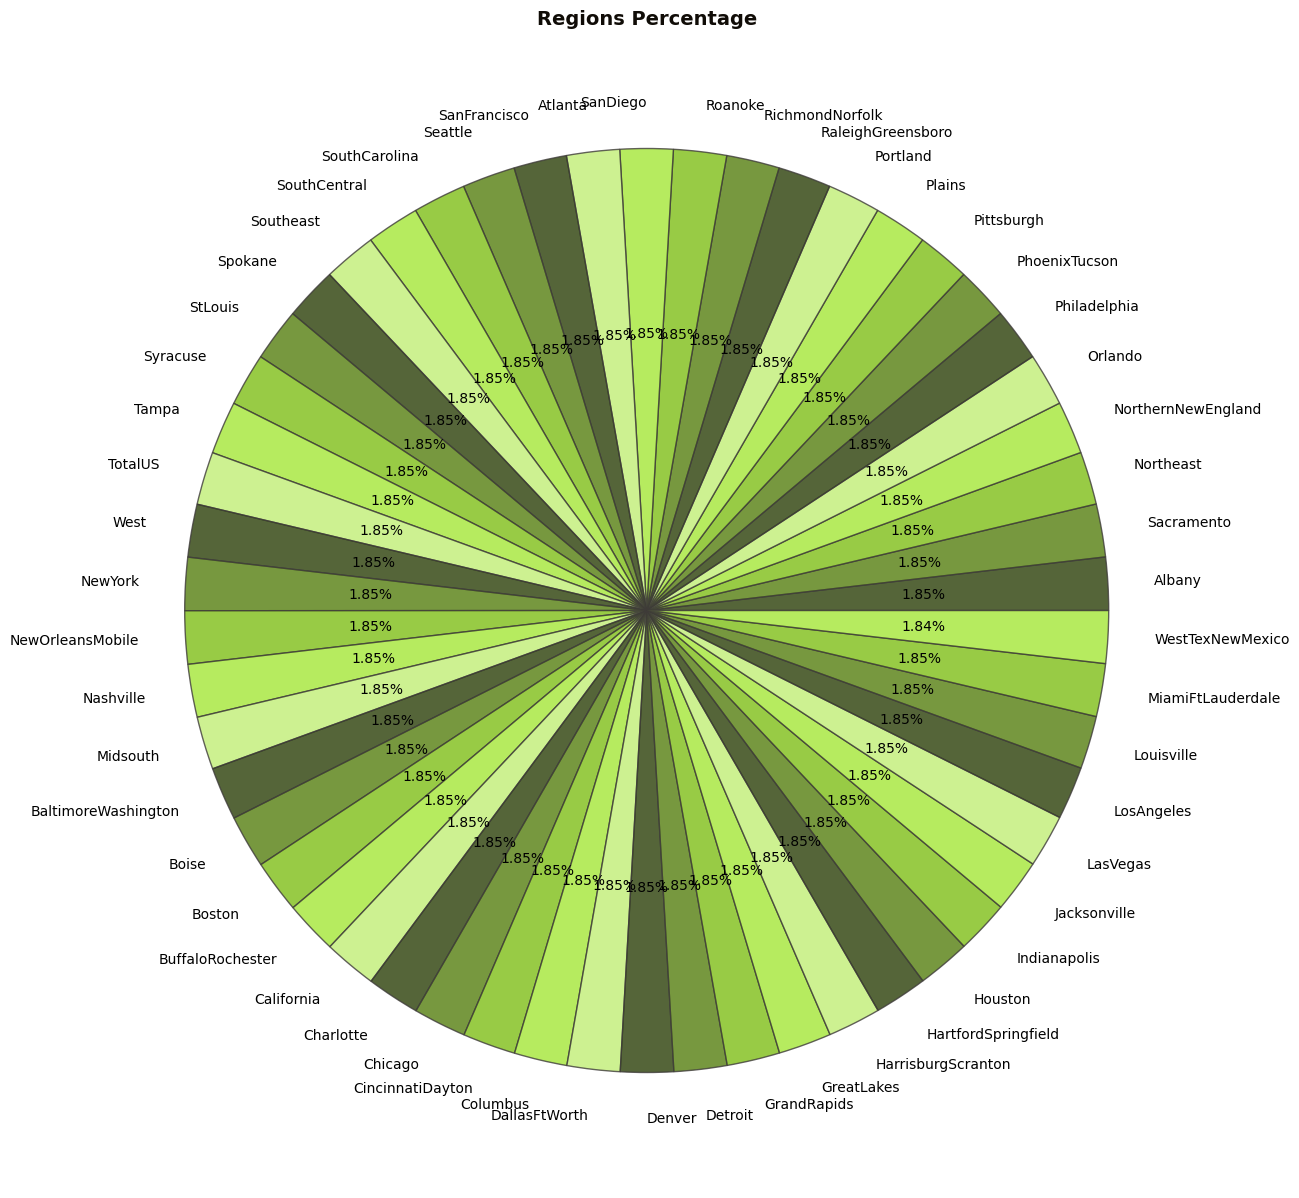

In [12]:
# --- Colors and Labels (Null Values Dropped) ---
colors = olive_grad[0:5]
labels = ds['region'].dropna().unique()
order = ds['region'].value_counts().index

# --- Pie Chart ---
plt.figure(figsize = (15, 15))
plt.title('Regions Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
plt.pie(ds['region'].value_counts(), labels = order, colors = colors,
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%');

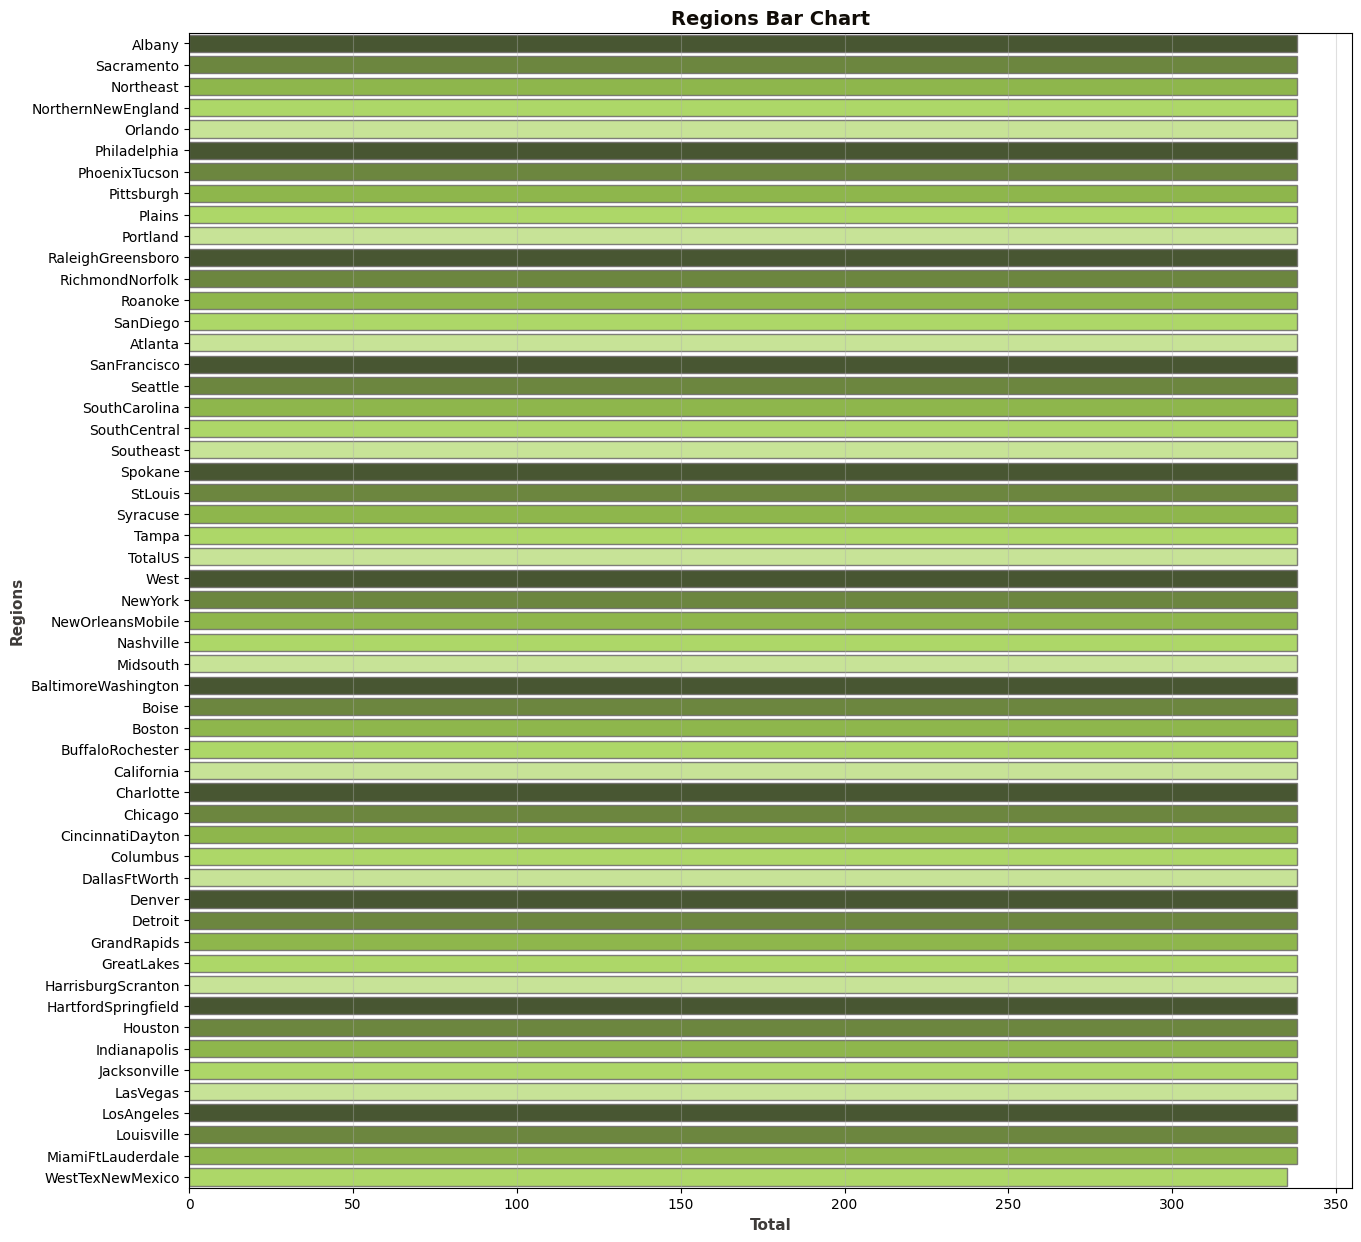

In [13]:
# --- Bar Chart ---
plt.figure(figsize = (15, 15))
plt.title('Regions Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
sns.countplot(y = 'region', data = ds, order = order, palette = colors, edgecolor = black_grad[2], alpha = 0.85)
plt.xlabel('Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Regions', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'x', alpha = 0.4);

In [15]:
# --- Descriptive Statistics ---
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags',
    'XLarge Bags']].describe().T.style.background_gradient(cmap='YlOrBr').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.000000,1.405978,0.402677,0.440000,1.100000,1.370000,1.660000,3.250000
Total Volume,18249.000000,850644.013009,3453545.355399,84.560000,10838.580000,107376.760000,432962.290000,62505646.520000
4046,18249.000000,293008.424531,1264989.081763,0.000000,854.070000,8645.300000,111020.200000,22743616.170000
4225,18249.000000,295154.568356,1204120.401135,0.000000,3008.780000,29061.020000,150206.860000,20470572.610000
4770,18249.000000,22839.735993,107464.068435,0.000000,0.000000,184.990000,6243.420000,2546439.110000
Total Bags,18249.000000,239639.202060,986242.399216,0.000000,5088.640000,39743.830000,110783.370000,19373134.370000
Small Bags,18249.000000,182194.686696,746178.514962,0.000000,2849.420000,26362.820000,83337.670000,13384586.800000
Large Bags,18249.000000,54338.088145,243965.964547,0.000000,127.470000,2647.710000,22029.250000,5719096.610000
XLarge Bags,18249.000000,3106.426507,17692.894652,0.000000,0.000000,0.000000,132.500000,551693.650000


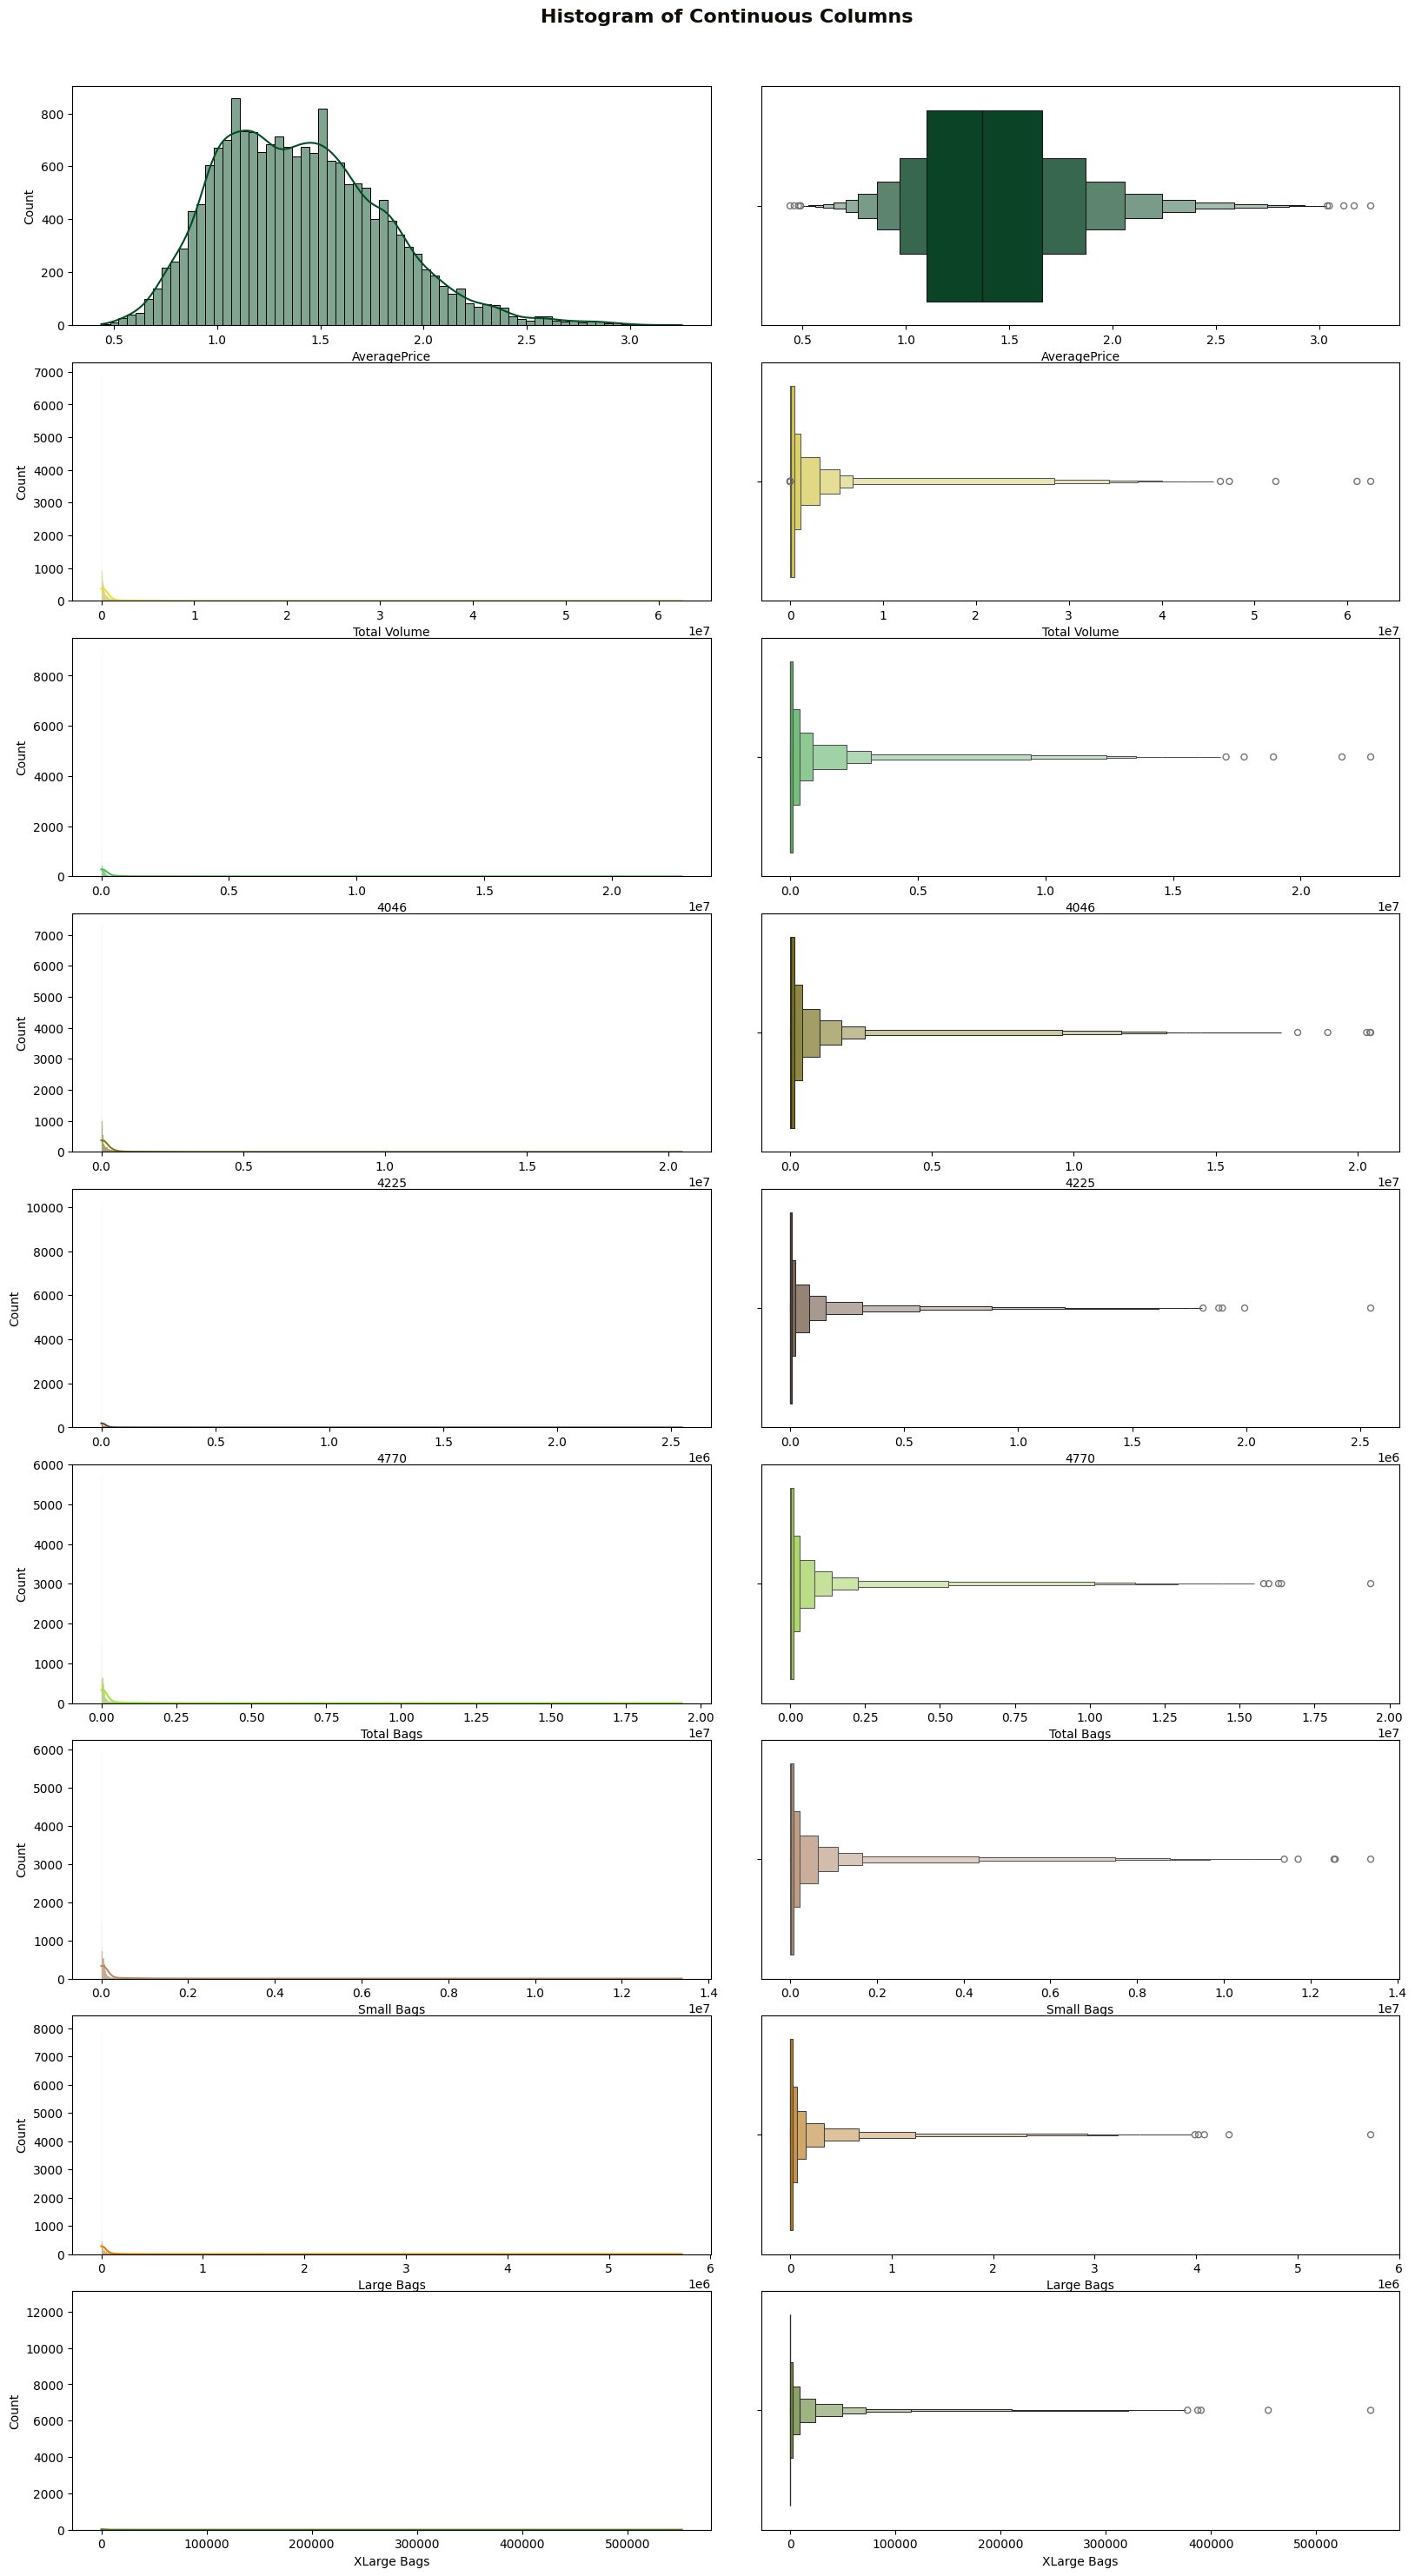

In [17]:
# --- Plot Size ---
fig, axs = plt.subplots(9, 2, figsize = (16, 30))

# --- General Title ---
fig.tight_layout()
fig.subplots_adjust(top = 0.95)
fig.suptitle('Histogram of Continuous Columns', fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif',
             color = black_grad[0])

# --- Continuous Variables (Row 1) ---
sns.histplot(data = ds, x = 'AveragePrice', kde = True, ax = axs[0, 0], color = '#004D25')
sns.boxenplot(data = ds, x = 'AveragePrice', ax = axs[0, 1], color = '#004D25')

# --- Continuous Variables (Row 2) ---
sns.histplot(data = ds, x = 'Total Volume', kde = True, ax = axs[1, 0], color = '#EDDE30')
sns.boxenplot(data = ds, x = 'Total Volume', ax = axs[1, 1], color = '#EDDE30')
#--- Continuous Variables (Row 3) ---
sns.histplot(data = ds, x='4046', kde = True, ax = axs[2, 0], color = '#48BF53')
sns.boxenplot(data = ds, x = '4046', ax = axs[2, 1], color = '#48BF53')

# --- Continuous Variables (Row 4) ---
sns.histplot(data = ds, x = '4225', kde = True, ax = axs[3, 0], color = '#837A0B')
sns.boxenplot(data = ds, x = '4225', ax = axs[3, 1], color = '#837A0B')

# --- Continuous Variables (Row 5) ---
sns.histplot(data = ds, x = '4770', kde = True, ax = axs[4, 0], color = '#664228')
sns.boxenplot(data = ds, x = '4770', ax = axs[4, 1], color = '#664228')

# --- Continuous Variables (Row 6) ---
sns.histplot(data = ds, x = 'Total Bags', kde = True, ax = axs[5, 0], color = '#A4E637')
sns.boxenplot(data = ds, x = 'Total Bags', ax = axs[5, 1], color = '#A4E637')

# --- Continuous Variables (Row 7) ---
sns.histplot(data = ds, x = 'Small Bags', kde = True, ax = axs[6, 0], color = '#BF865D')
sns.boxenplot(data = ds, x = 'Small Bags', ax = axs[6, 1], color = '#BF865D')

# --- Continuous Variables (Row 8) ---
sns.histplot(data = ds, x = 'Large Bags', kde = True, ax = axs[7, 0], color = '#D98000')
sns.boxenplot(data = ds, x = 'Large Bags', ax = axs[7, 1], color = '#D98000')

# --- Continuous Variables (Row 9) ---
sns.histplot(data = ds, x = 'XLarge Bags', kde = True, ax = axs[8, 0], color = '#557F0F')
sns.boxenplot(data = ds, x = 'XLarge Bags', ax = axs[8, 1], color = '#557F0F');

In [18]:
# --- Skewness of Continuous Variables ---
print('\033[92m\033[1m'+'.: Continuous Columns Skewness :.'+'\033[0m')
print('\033[92m*' * 34+'\033[0m')
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags',
    'XLarge Bags']].skew(axis = 0, skipna = True)

.: Continuous Columns Skewness :.
**********************************


,0
AveragePrice,0.580303
Total Volume,9.007687
4046,8.648220
4225,8.942466
4770,10.159396
Total Bags,9.756072
Small Bags,9.540660
Large Bags,9.796455
XLarge Bags,13.139751


In [19]:
# --- Kurtoisis of Continuous Variables ---
print('\033[92m\033[1m'+'.: Continuous Columns Kurtosis :.'+'\033[0m')
print('\033[92m*' * 34+'\033[0m')
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags',
    'XLarge Bags']].kurt(axis = 0, skipna = True)

.: Continuous Columns Kurtosis :.
**********************************


,0
AveragePrice,0.325196
Total Volume,92.104458
4046,86.809113
4225,91.949022
4770,132.563441
Total Bags,112.272156
Small Bags,107.012885
Large Bags,117.999481
XLarge Bags,233.602612


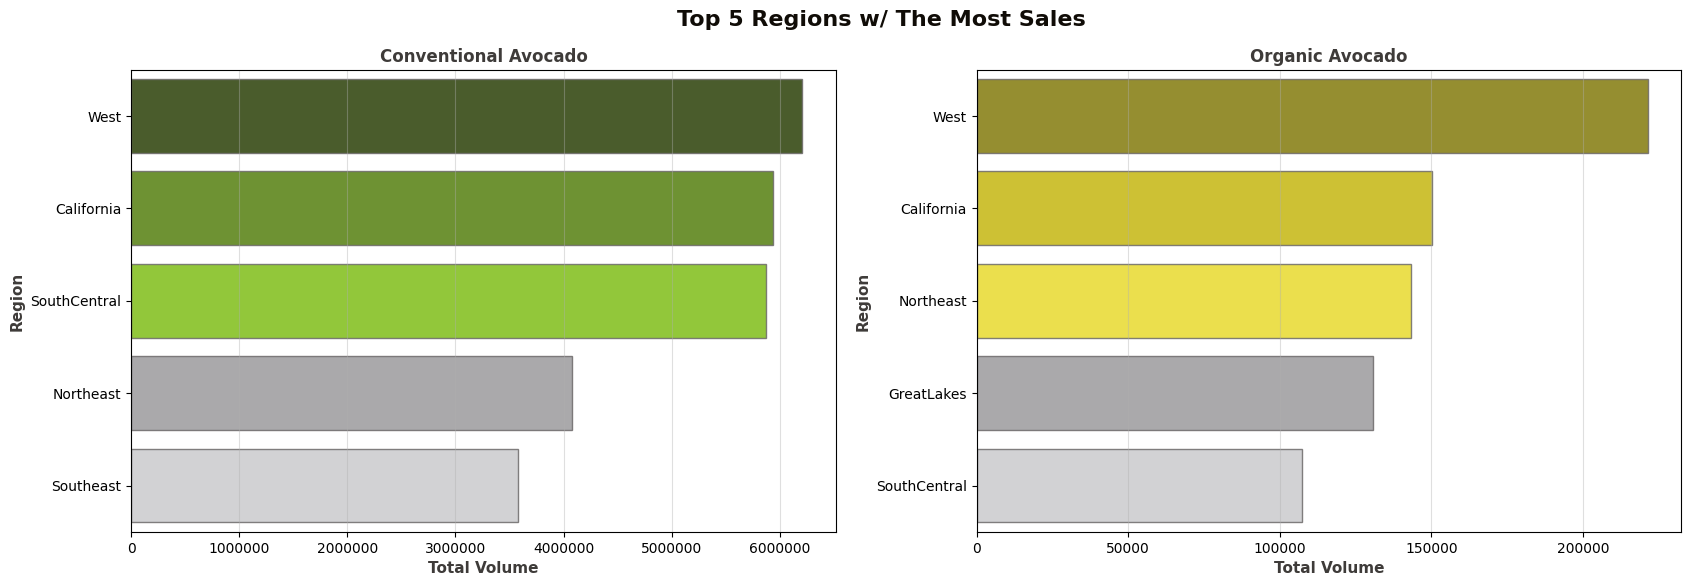

In [23]:
# --- Create New Dataframes based on Type ---
eda0 = ds[['region', 'Total Volume']][ds.type == 'conventional']
eda0 = eda0[eda0['region'] != 'TotalUS']
eda0 = eda0.groupby(['region']).aggregate({'Total Volume': np.mean}).sort_values(by = 'Total Volume',
                                                                                 ascending = False).iloc[:5]

eda1 = ds[['region', 'Total Volume']][ds.type == 'organic']
eda1 = eda1[eda1['region'] != 'TotalUS']
eda1 = eda1.groupby(['region']).aggregate({'Total Volume': np.mean}).sort_values(by = 'Total Volume',
                                                                                 ascending = False).iloc[:5]

# --- General Settings of Bar Charts ---
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Top 5 Regions w/ The Most Sales', fontweight = 'heavy', fontsize = 16, fontfamily = 'sans-serif',
             color = black_grad[0])
# --- Bar Chart Left ---
plt.subplot(1, 2, 1)
plt.title('Conventional Avocado', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
bar_left = sns.barplot(x='Total Volume', y = eda0.index, data = eda0, palette = black_grad, edgecolor = black_grad[2],
                       alpha = 0.85)
bar_left.patches[0].set_facecolor(olive_grad[0])
bar_left.patches[1].set_facecolor(olive_grad[1])
bar_left.patches[2].set_facecolor(olive_grad[2])
plt.xlabel('Total Volume', fontweight='bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0)
plt.grid(axis = 'x', alpha = 0.4)
plt.ticklabel_format(style = 'plain', axis = 'x')
# --- Bar Chart Right ---
plt.subplot(1, 2, 2)
plt.title('Organic Avocado', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
bar_right = sns.barplot(x='Total Volume', y = eda1.index, data = eda1, palette = black_grad, edgecolor = black_grad[2],
                        alpha = 0.85)
bar_right.patches[0].set_facecolor(yellow_grad[1])
bar_right.patches[1].set_facecolor(yellow_grad[2])
bar_right.patches[2].set_facecolor(yellow_grad[3])
plt.xlabel('Total Volume', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0)
plt.grid(axis = 'x', alpha = 0.4)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show();

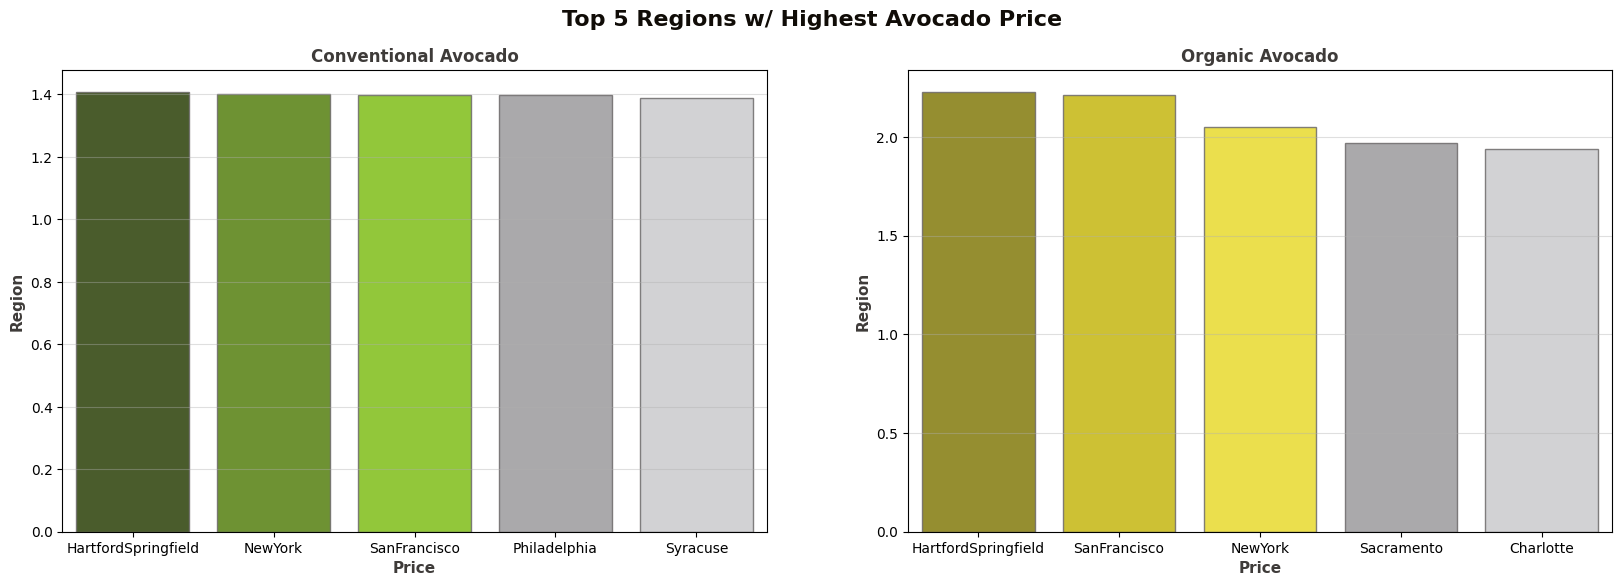

In [26]:
# --- Create New Dataframes based on Type ---
eda2 = ds[['region', 'AveragePrice']][ds.type == 'conventional']
eda2 = eda2.groupby(['region']).aggregate({'AveragePrice': np.mean}).sort_values(by = 'AveragePrice',
                                                                                 ascending = False).iloc[:5]

eda3 = ds[['region', 'AveragePrice']][ds.type == 'organic']
eda3 = eda3.groupby(['region']).aggregate({'AveragePrice': np.mean}).sort_values(by = 'AveragePrice',
                                                                                 ascending = False).iloc[:5]

# --- General Settings of Bar Charts ---
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Top 5 Regions w/ Highest Avocado Price', fontweight = 'heavy', fontsize = 16, fontfamily = 'sans-serif',
             color = black_grad[0])

# --- Bar Chart Left ---
plt.subplot(1, 2, 1)
plt.title('Conventional Avocado', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
bar_left = sns.barplot(y = 'AveragePrice', x = eda2.index, data = eda2, palette = black_grad, edgecolor = black_grad[2],
                       alpha = 0.85)
bar_left.patches[0].set_facecolor(olive_grad[0])
bar_left.patches[1].set_facecolor(olive_grad[1])
bar_left.patches[2].set_facecolor(olive_grad[2])
plt.xlabel('Price', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.ticklabel_format(style = 'plain', axis = 'y')

# --- Bar Chart Right ---
plt.subplot(1, 2, 2)
plt.title('Organic Avocado', fontweight = 'bold', fontsize = '12', fontfamily = 'sans-serif', color = black_grad[1])
bar_right = sns.barplot(y='AveragePrice', x = eda3.index, data = eda3, palette = black_grad, edgecolor = black_grad[2],
                        alpha = 0.85)
bar_right.patches[0].set_facecolor(yellow_grad[1])
bar_right.patches[1].set_facecolor(yellow_grad[2])
bar_right.patches[2].set_facecolor(yellow_grad[3])
plt.xlabel('Price', fontweight='bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show();

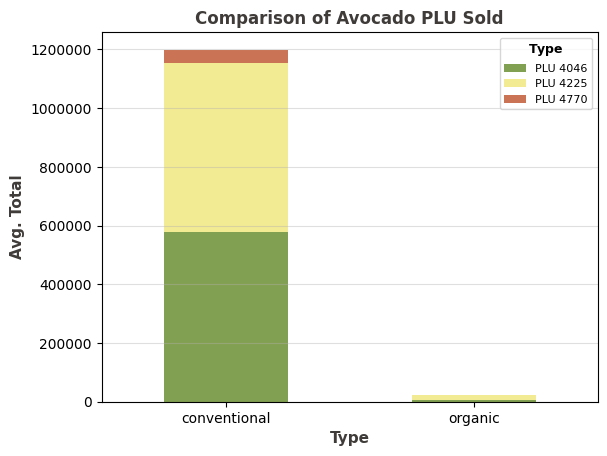

In [30]:
# --- Creating New Data Frame ---
eda30 = ds[['type', '4046', '4225', '4770']]
eda30 = eda30.groupby(['type']).aggregate({'4046': np.mean, '4225': np.mean, '4770': np.mean})

# --- Stacked Bar Chart ---
eda30.plot(kind='bar', stacked = True, color = color_mix[-4:-1], alpha = 0.85)
plt.title('Comparison of Avocado PLU Sold', fontweight = 'bold', fontsize = '12', fontfamily = 'sans-serif',
          color = black_grad[1])
plt.xlabel('Type', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Avg. Total', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ['PLU 4046','PLU 4225', 'PLU 4770'], title = '$\\bf{Type}$', fontsize = '8', title_fontsize = '9',
           loc = 'upper right', frameon = True)
plt.xticks(rotation = 0)
plt.ticklabel_format(style = 'plain', axis = 'y');

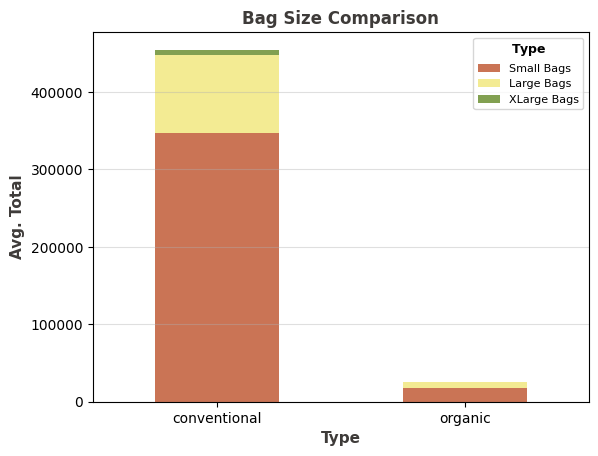

In [32]:
# --- Creating New Data Frame ---
eda31 = ds[['type', 'Small Bags', 'Large Bags', 'XLarge Bags']]
eda31 = eda31.groupby(['type']).aggregate({'Small Bags': np.mean, 'Large Bags': np.mean, 'XLarge Bags': np.mean})

# --- Stacked Bar Chart ---
eda31.plot(kind = 'bar', stacked = True, color = color_mix[3:0:-1], alpha = 0.85)
plt.title('Bag Size Comparison', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
plt.xlabel('Type', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Avg. Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ['Small Bags','Large Bags', 'XLarge Bags'], title = '$\\bf{Type}$', fontsize = 8, title_fontsize = 9,
           loc = 'upper right', frameon = True)
plt.xticks(rotation = 0)
plt.ticklabel_format(style = 'plain', axis = 'y');

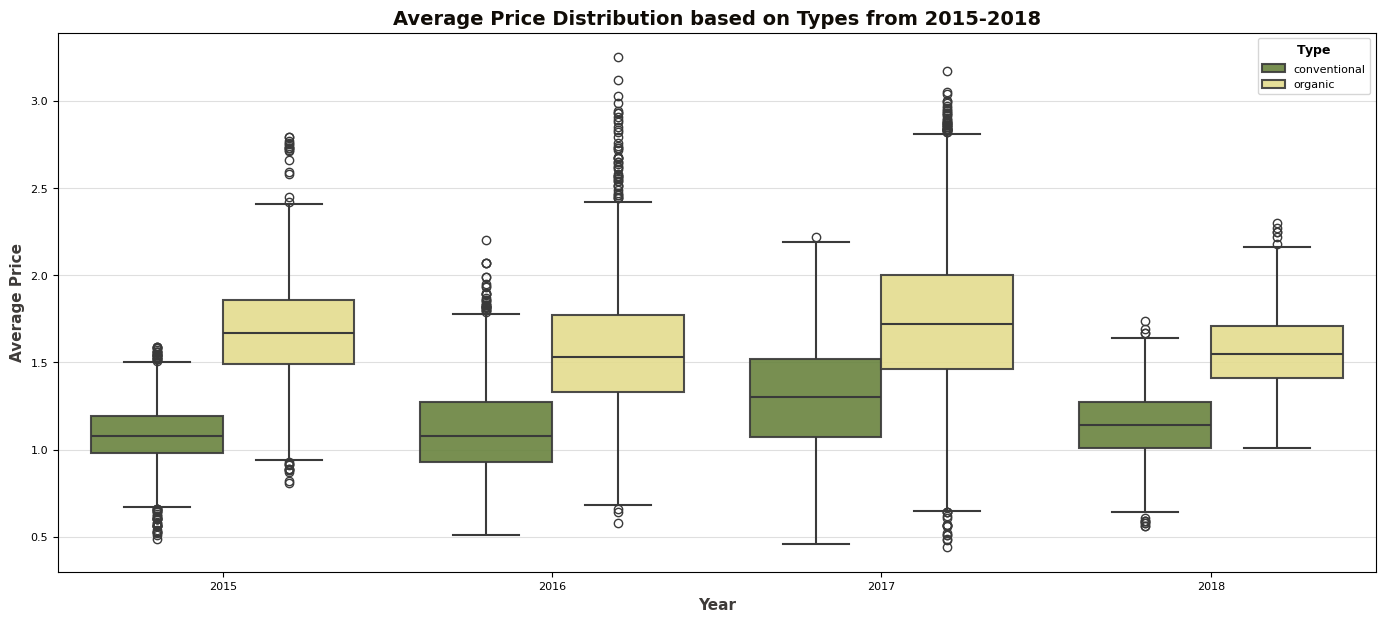

In [33]:
# --- Creating Box Plot based on Type ---
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.title('Average Price Distribution based on Types from 2015-2018', fontweight='bold', fontsize = 14,
          fontfamily = 'sans-serif', color = black_grad[0])
sns.boxplot(x = 'year', y = 'AveragePrice', hue = 'type', data = ds, ax = ax, palette = color_mix[1:3],
            boxprops = dict(alpha = 0.9), linewidth = 1.5)
plt.xlabel('Year', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Average Price', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = '$\\bf{Type}$', fontsize = 8, title_fontsize = 9, loc = 'upper right', frameon = True)
plt.grid(axis = 'y', alpha = 0.4)
plt.show()

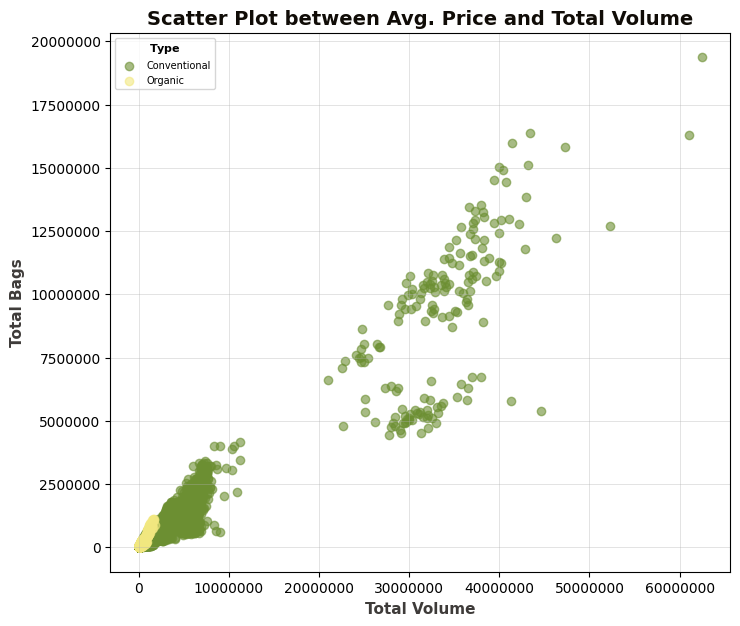

In [34]:
x0 = ds.xs('Total Volume', axis = 1)[ds.type == 'conventional']
x1 = ds.xs('Total Volume', axis = 1)[ds.type == 'organic']
y0 = ds.xs('Total Bags', axis = 1)[ds.type == 'conventional']
y1 = ds.xs('Total Bags', axis = 1)[ds.type == 'organic']

# --- Creating Scatter Plot ---
plt.figure(figsize = (8, 7))
plt.title('Scatter Plot between Avg. Price and Total Volume', fontweight = 'bold', fontsize = 14,
          fontfamily = 'sans-serif', color = black_grad[0])
plt.scatter(x = x0, y = y0, c = color_mix[1], alpha = 0.6, linewidths = 1)
plt.scatter(x = x1, y = y1, c = color_mix[2], alpha = 0.6, linewidths = 1)
plt.legend(['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8, loc = 'upper left',
           frameon = True)
plt.xlabel('Total Volume', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total Bags', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ticklabel_format(style = 'plain', axis = 'both')
plt.grid(axis = 'both', alpha = 0.5, lw = 0.5)
plt.show()

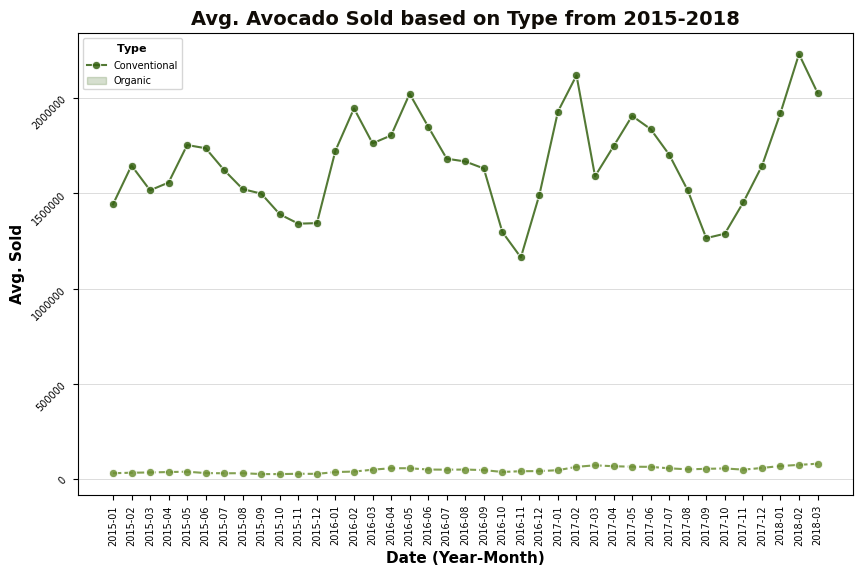

In [36]:
# --- Calculating Mean of `Total Volume` grouped by Type and Date ---
dseda8 = ds[['Date', 'Total Volume', 'type']]
dseda8['Date'] = pd.DatetimeIndex(dseda8['Date'])
dseda8['Date'] = dseda8['Date'].apply(lambda x: x.strftime('%Y-%m'))
group8 = dseda8.groupby(['Date', 'type'])
mnth_avg8 = group8.aggregate({'Total Volume': np.mean})

# --- Creating Time Series Plot of Avg. Price ---
plt.figure(figsize = (10, 6))
plt.title('Avg. Avocado Sold based on Type from 2015-2018', fontweight = 'bold', fontsize = 14,
          fontfamily = 'sans-serif', color = black_grad[0])
sns.lineplot(data = mnth_avg8, x = 'Date', y = 'Total Volume', hue = 'type', style = 'type', markers = ['o', 'o'],
             palette = color_mix[0:2], alpha = 0.85)
plt.xlabel('Date (Year-Month)', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ylabel('Avg. Sold', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 90, fontsize = 7)
plt.yticks(rotation = 45, fontsize = 7)
plt.grid(axis='y', alpha = 0.5, lw = 0.6)
plt.grid(axis='x', alpha = 0)
plt.legend(labels = ['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8, frameon=True);

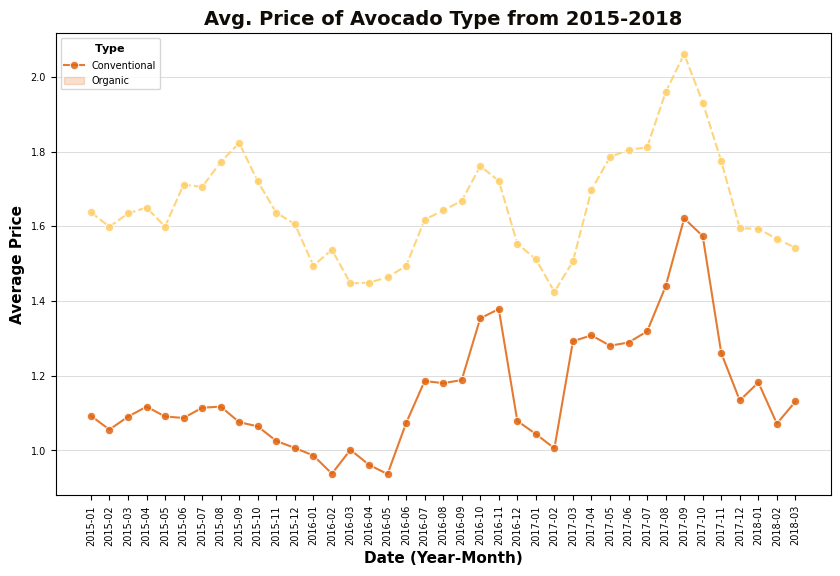

In [40]:
dseda9 = ds[['Date', 'AveragePrice', 'type']]
dseda9['Date'] = pd.DatetimeIndex(dseda9['Date'])
dseda9['Date'] = dseda9['Date'].apply(lambda x: x.strftime('%Y-%m'))
group9 = dseda9.groupby(['Date', 'type'])
mnth_avg9 = group9.aggregate({'AveragePrice': np.mean})

# --- Creating Time Series Plot of Avg. Price ---
plt.figure(figsize = (10, 6))
plt.title('Avg. Price of Avocado Type from 2015-2018', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
          color = black_grad[0])
sns.lineplot(data = mnth_avg9, x = 'Date', y = 'AveragePrice', hue = 'type', style = 'type', markers = ['o', 'o'],
             palette = 'YlOrBr_r', alpha = 0.85)
plt.xlabel('Date (Year-Month)', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ylabel('Average Price', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = 90, fontsize = 7)
plt.yticks(fontsize = 7)
plt.grid(axis = 'y', alpha = 0.5, lw = 0.6)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8,
           loc = 'upper left', frameon = True);

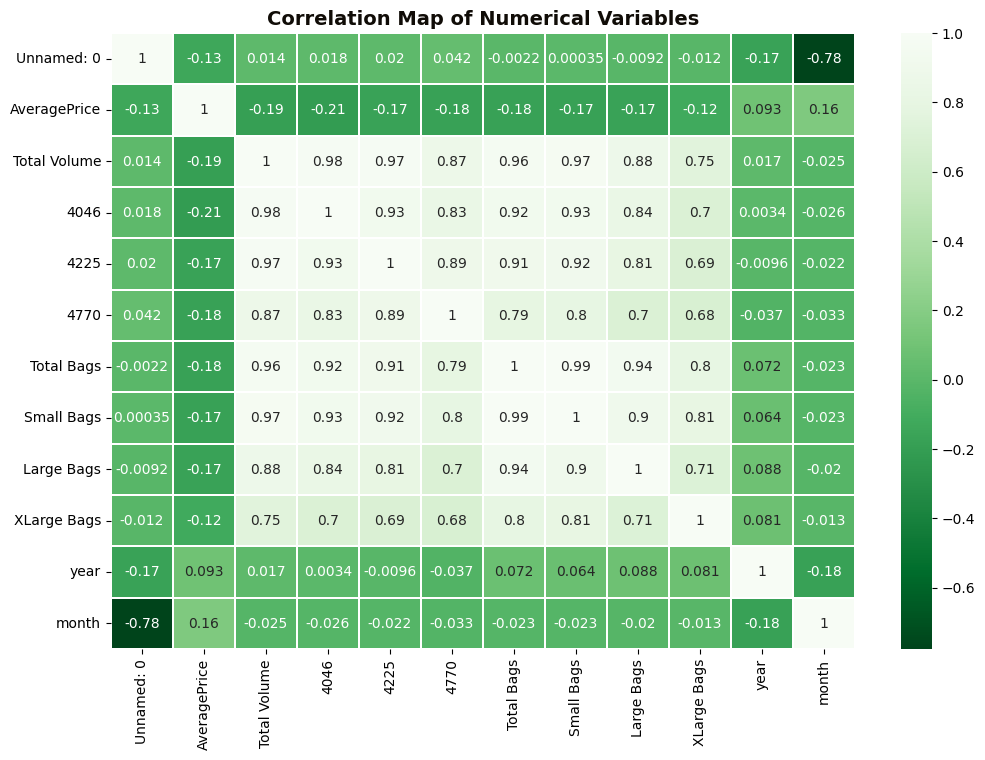

In [42]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize = (12, 8))
sns.heatmap(ds.select_dtypes(include=np.number).corr(), annot = True, cmap = 'Greens_r', linewidths = 0.1)
plt.title('Correlation Map of Numerical Variables', fontsize = 14, fontweight = 'bold', fontfamily = 'sans-serif',
          color = black_grad[0]);